# INTRODUCTION

**DATE: 21ST MAY 2022**

This is a Capstone group project given to the Classification team of the 1st training cohort of Kadatemy in 2022. The group consists of three students who enrolled in the cohort and started training on coding with Python language in February 2022. The students include:



1.   Ifunanya S. Anyanwu (Dr. STM)
2.   Hussaina Abdullahi
3.   Ugochukwu Chukwunyere



---


The essence of the project was to solidify all that has been learnt in the training span of three months and to build team work amongst the learners.


All codes that generated the findings in this project are attached to the GitHub file herein which are co-owned by the three contributors of this project.


The dataset is on "Telco Customer Churn" and was gotten from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).




# LOADING DRIVE, FILE, AND LIBRARIES

In [ ]:
#Hussaina's drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Hussaina's file load

%cd /content/drive/MyDrive/Classification_CP

/content/drive/MyDrive/Classification_CP


In [48]:
#STM's drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [420]:
#STM's file load

%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#Ugo's drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#Ugo's file load

%cd /content/drive/MyDrive/CP

/content/drive/MyDrive/CP


In [579]:
#loading all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

#STEP 1: DATA PRE-PROCESSING

In [501]:
#loading and examining the dataset
df = pd.read_csv('TelcoCustomerChurn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [502]:
#a quick look at what the values are like
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [503]:
#examining for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [504]:
#dropping the "un-needed" column - customerID
df.drop(["customerID"], axis = 1, inplace = True)

In [505]:
#performing a more thorough examination of all columns
df.describe(include = "all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


From the table above, it can be seen that "TotalCharges" actually has empty cells but they are not entered in as "NaN", hence we will convert to #NaN.

But then, to confirm the empty cells, we ran the code below:

In [506]:
#searching for cases with empty cells
print(np.where(df["TotalCharges"]==" "))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),)


In [507]:
#replacing empty cells in the column with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ","NaN")

#confirming that the replacement has taken place by calling and expecting the same array of empty cells
print(np.where(df["TotalCharges"]=="NaN"))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),)


In [508]:
#Based on a thorough look on the dataframe, we used the code below to examine any relationship ...
#between the missing values in "Total  Charges" and other likely related columns - tenure and monthly charges

#calling all cases with missing total charges alongside randomly selected 4 cases to serve as control
df.iloc[[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754, 5, 30, 1009, 5682],[4,17,18]]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


From the table above, it can be seen that:



> 1. all cases with missing total charges have 0 tenure


> 2. the total charge per case is closely related to the product of tenure and monthly charges, (For example, the product of case no. 5 = 797.2, while that of case no. 1009 is 477.25) and these are close to the respective stipulated total charges.


To confirm the relationship of the missing values, we called for cases where tenure is equal to 0 as seen below.

In [509]:
#comparing cases with missing total charges with cases with zero tenure

#calling cases where tenure is equal to zero
print("Cases with zero tenure:")
print(np.where(df["tenure"]==0))
print("\n")

#calling cases with missing total charges
print("Cases with missing total charges")
print(np.where(df["TotalCharges"]=="NaN"))

Cases with zero tenure:
(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),)


Cases with missing total charges
(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),)


From the findings above, it can be seen that the two arrays are exactly the same, indicating that all cases with missing total charges have zero tenure.


Based on this, we replaced the missing values with "0"
Zero was used because that is the resulting product of the product of their tenure and monthly charges.

In [510]:
#Replacing missing values with 0
df["TotalCharges"] = df["TotalCharges"].replace("NaN", 0)

#ensuring the data type is reverted to float as desired
df['TotalCharges'] = df['TotalCharges'].astype('float64')

#assessing the new state of the dataset and confirming that the data type of "TotalCharges" has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# DESCRIPTIVE ANALYSIS




---


**DESCRIPTIVE ANALYSIS OF SOCIO-DEMOGRAPHIC VARIABLES**

In [511]:
#having a quick look at the dataset once again
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [512]:
#change the values of the senior citizen variable to Yes and No, where 1 is Yes and 0 is No
# df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "No" if x == 0 else "Yes")

#confirming the change of the unique values of "SeniorCitizen"
df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 1.0, 'FIG 1: DISTRIBUTION OF CHURN AMONG THE CUSTOMERS')

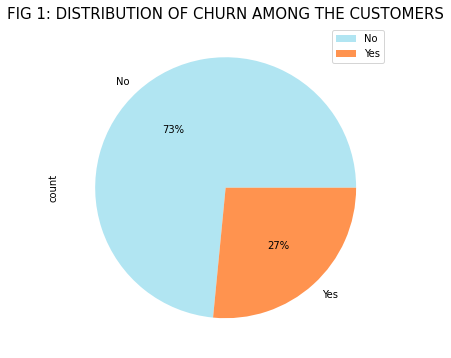

In [513]:
#Displaying the distribution of churned vs non-churned customers

pd.crosstab(df["Churn"], columns = "count").\
plot(kind = "pie", subplots = True, autopct = '%.0f%%', 
     colors=["#b1e5f2", "#ff934f"], figsize = (6,6))

#setting the title of the figure
plt.title("FIG 1: DISTRIBUTION OF CHURN AMONG THE CUSTOMERS", fontsize=15)

Text(0.5, 0.98, 'FIG 2: SOCIODEMOGRAPHIC CHARACTERISTICS OF RESPONDENTS')

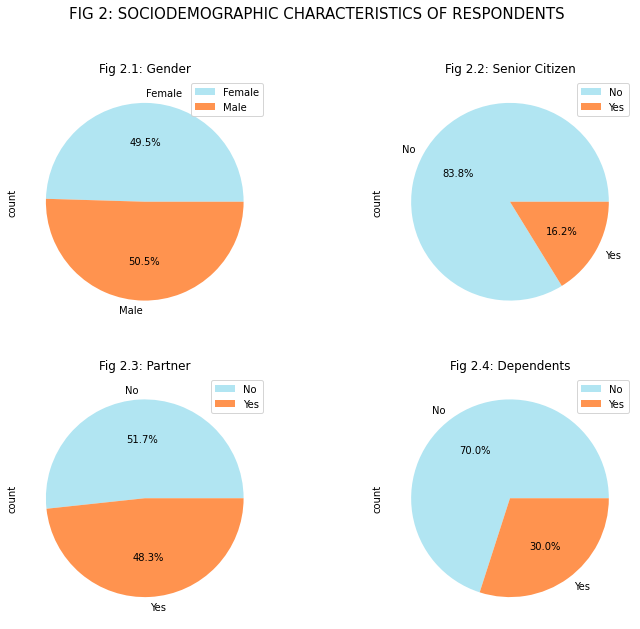

In [514]:
#The descriptives of the socio-demo variables (gender, seniorCitizen, Partner, and Dependents)

#Specifying the figure details
figure, axis = plt.subplots(2, 2, figsize=(12,10))

#Specifying the various subplots' details
pd.crosstab(df["gender"], columns = "count").plot(kind = "pie", subplots = True,\
                autopct = '%.1f%%', ax=axis[0,0], colors=["#b1e5f2", "#ff934f"])
pd.crosstab(df["SeniorCitizen"], columns = "count").plot(kind = "pie", subplots = True,\
                      autopct = '%.1f%%', ax=axis[0,1], colors=["#b1e5f2", "#ff934f"])
pd.crosstab(df["Partner"], columns = "count").plot(kind = "pie", subplots = True,\
                      autopct = '%.1f%%', ax=axis[1,0], colors=["#b1e5f2", "#ff934f"])
pd.crosstab(df["Dependents"], columns = "count").plot(kind = "pie", subplots = True,\
                      autopct = '%.1f%%', ax=axis[1,1], colors=["#b1e5f2", "#ff934f"])

#Specifying the title of each subplot
axis[0,0].set_title("Fig 2.1: Gender")
axis[0,1].set_title("Fig 2.2: Senior Citizen")
axis[1,0].set_title("Fig 2.3: Partner")
axis[1,1].set_title("Fig 2.4: Dependents")

#Specifying the main title of the image
plt.suptitle("FIG 2: SOCIODEMOGRAPHIC CHARACTERISTICS OF RESPONDENTS", fontsize=15)

Text(0.5, 1.01, 'FIG 3: PHONE SERVICE OF RESPONDENTS')

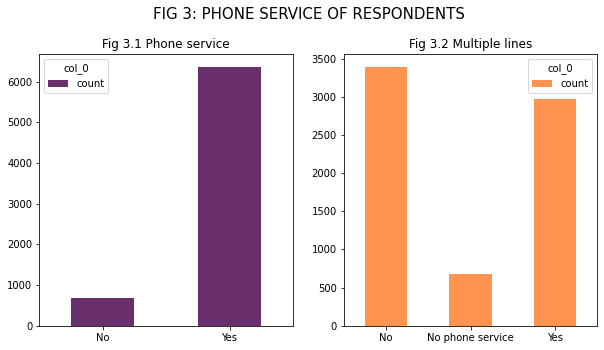

In [515]:
#Descriptives of marketing characteristics - Phone Service

figure, axis = plt.subplots(1, 2, figsize=(10,5))

pd.crosstab(df["PhoneService"], columns="count").\
plot(kind="bar", rot=0, title="Fig 3.1 Phone service", ax=axis[0], color="#69306D", xlabel="")

pd.crosstab(df["MultipleLines"], columns="count").\
plot(kind="bar", rot=0, title="Fig 3.2 Multiple lines", ax=axis[1], color="#ff934f", xlabel="")

#Specifying the main title of the image
plt.suptitle("FIG 3: PHONE SERVICE OF RESPONDENTS", fontsize=15, y=1.01)

Text(0.5, 0.95, 'FIG 4: INTERNET SERVICE CHARACTERISTICS')

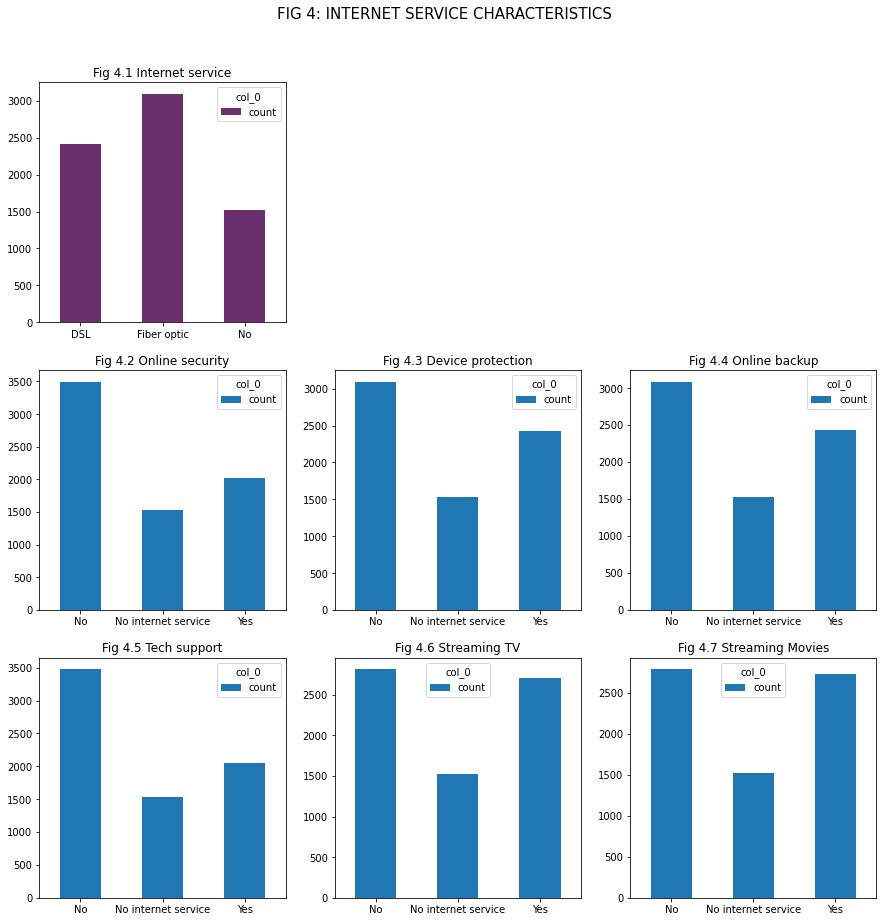

In [516]:
#Descriptives of marketing characteristics - Internet Service

#specifying the main plot
figure, axis = plt.subplots(3, 3, figsize=(15,15))

#specifying the respective subplots and their customisation
pd.crosstab(df["InternetService"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.1 Internet service", color="#69306D", ax=axis[0,0], xlabel="")

pd.crosstab(df["OnlineSecurity"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.2 Online security", ax=axis[1,0], xlabel="")

pd.crosstab(df["DeviceProtection"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.3 Device protection", ax=axis[1,1], xlabel="")

pd.crosstab(df["OnlineBackup"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.4 Online backup", ax=axis[1,2], xlabel="")

pd.crosstab(df["TechSupport"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.5 Tech support", ax=axis[2,0], xlabel="")

pd.crosstab(df["StreamingTV"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.6 Streaming TV", ax=axis[2,1], xlabel="")

pd.crosstab(df["StreamingMovies"], columns="count").\
plot(kind="bar", rot=0, title="Fig 4.7 Streaming Movies", ax=axis[2,2], xlabel="")

#turning off unused subplots
axis[0,1].axis("off")
axis[0,2].axis("off")

#specifying main title
plt.suptitle("FIG 4: INTERNET SERVICE CHARACTERISTICS", fontsize=15, y=0.95)

Text(0.5, 1.02, 'FIGURE 5: PAYMENT DETAILS')

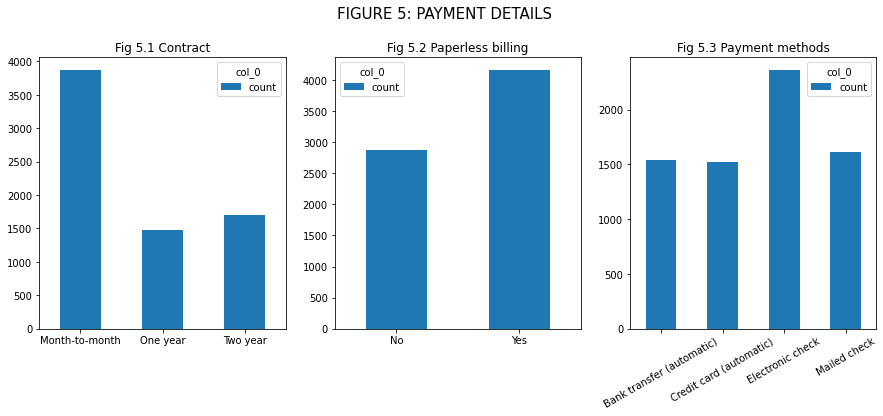

In [517]:
#Descriptives of marketing characteristics - Payment methods

figure, axis = plt.subplots(1, 3, figsize=(15,5))

#specifying subplot details
pd.crosstab(df["Contract"], columns="count").\
plot(kind="bar", rot=0, title="Fig 5.1 Contract", ax=axis[0], xlabel="")

pd.crosstab(df["PaperlessBilling"], columns="count").\
plot(kind="bar", rot=0, title="Fig 5.2 Paperless billing", ax=axis[1], xlabel="")

pd.crosstab(df["PaymentMethod"], columns="count").\
plot(kind="bar", rot=30, title="Fig 5.3 Payment methods", ax=axis[2], xlabel="")

#specifying main title
plt.suptitle("FIGURE 5: PAYMENT DETAILS", fontsize=15, y=1.02)

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


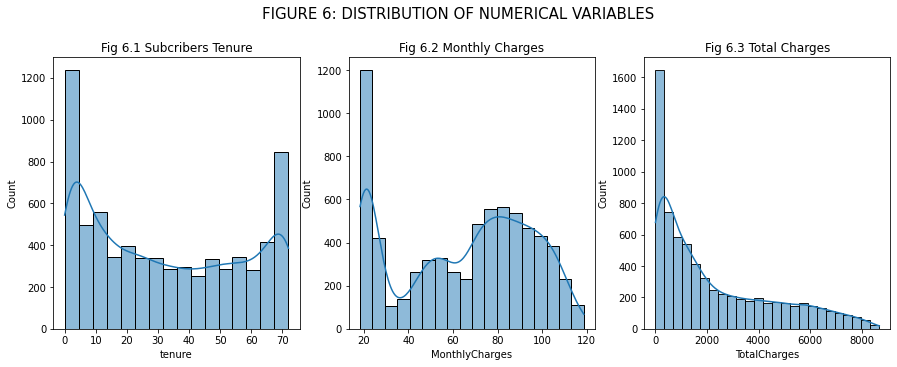

In [518]:
#Descriptives of numerical market characteristics = tenure, MonthlyCharges, TotalCharges

f, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df,x='tenure', kde=True, ax=axis[0]).set(title='Fig 6.1 Subcribers Tenure')

sns.histplot(data=df,x='MonthlyCharges', kde=True, ax=axis[1]).set(title='Fig 6.2 Monthly Charges')

sns.histplot(data=df,x='TotalCharges', kde=True, ax=axis[2]).set(title="Fig 6.3 Total Charges")


plt.suptitle("FIGURE 6: DISTRIBUTION OF NUMERICAL VARIABLES", fontsize=15, y=1.02)

df.describe(include=np.number)

# STEP 3: RELATIONSHIP EXPLORATION BETWEEN COLUMNS/VARIABLES

**This section will explore the relationship between the socio-demographic characteristics and churn. It will also explore between the market characteristics and churn**

Text(0.5, 0.98, 'FIG 7: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH CHURN')

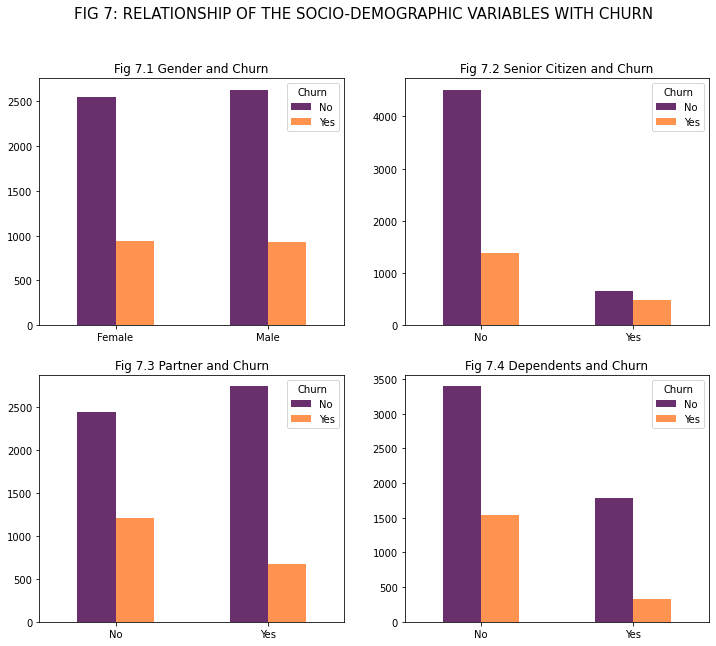

In [519]:
#Exploring the relationship of the socio-demographic variables and those who churning

#specifying the plots' image details
figure, axis = plt.subplots(2, 2, figsize=(12,10))


#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(df["gender"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 7.1 Gender and Churn", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 7.2 Senior Citizen and Churn", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 7.3 Partner and Churn", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 7.4 Dependents and Churn", ax=axis[1,1], xlabel="")


#specifying the title of the main image
plt.suptitle("FIG 7: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH CHURN", fontsize=15)

Text(0.5, 1.02, 'FIGURE 8: RELATIONSHIP OF THE PHONE SERVICE WITH CHURN')

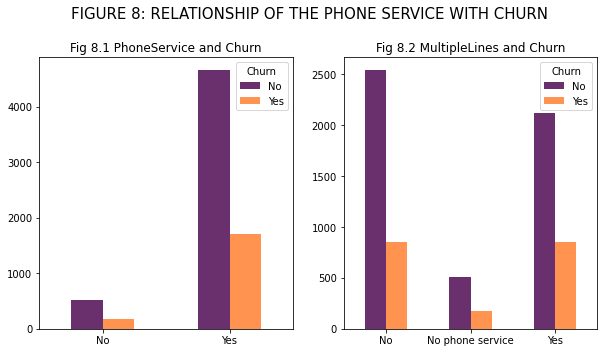

In [520]:
#Exploring the relationship of the phone service and churning
#specifying the plots' image details
figure, axis = plt.subplots(1, 2, figsize=(10,5))


#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(df["PhoneService"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 8.1 PhoneService and Churn", ax=axis[0], xlabel="")

pd.crosstab(df["MultipleLines"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 8.2 MultipleLines and Churn", ax=axis[1], xlabel="")


#specifying the title of the main image
plt.suptitle("FIGURE 8: RELATIONSHIP OF THE PHONE SERVICE WITH CHURN", fontsize=15, y=1.02)

Text(0.5, 0.93, 'FIGURE 9: RELATIONSHIP OF THE INTERNET SERVICE MARKET CHARACTERISTICS WITH CHURN')

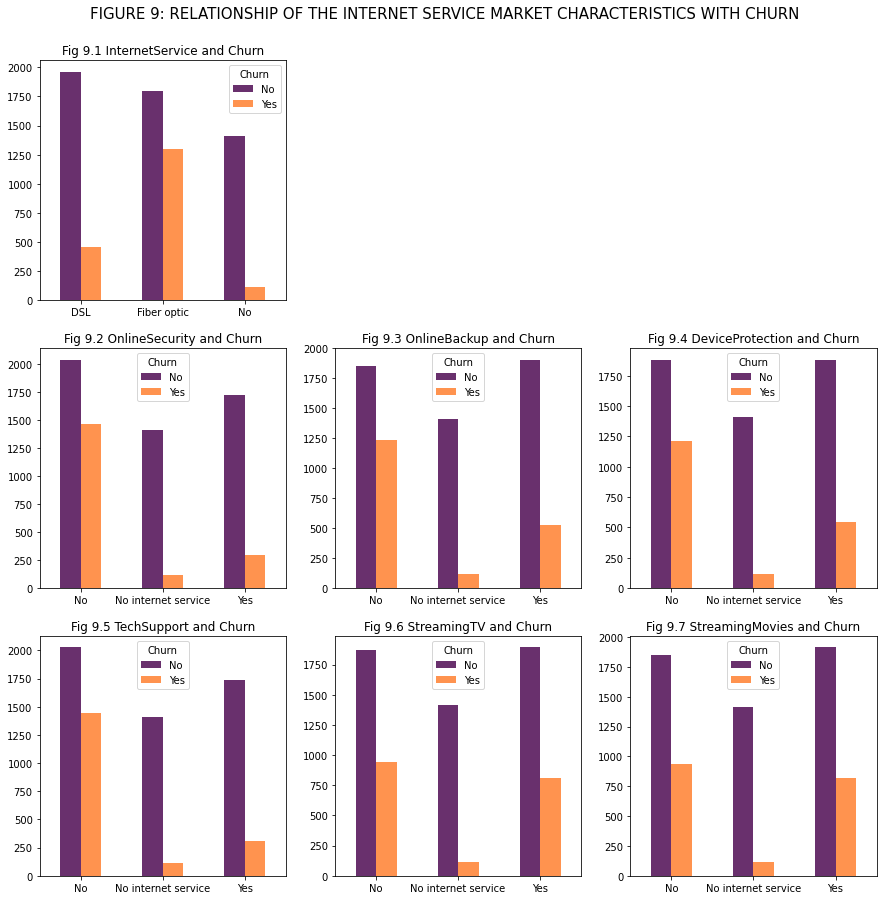

In [521]:
#Exploring the relationship of the internet service and churning
#specifying the plots' image details
figure, axis = plt.subplots(3, 3, figsize=(15,15))


#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(df["InternetService"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.1 InternetService and Churn", ax=axis[0,0], xlabel="")

pd.crosstab(df["OnlineSecurity"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.2 OnlineSecurity and Churn", ax=axis[1,0], xlabel="")

pd.crosstab(df["OnlineBackup"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.3 OnlineBackup and Churn", ax=axis[1,1], xlabel="")

pd.crosstab(df["DeviceProtection"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.4 DeviceProtection and Churn", ax=axis[1,2], xlabel="")

pd.crosstab(df["TechSupport"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.5 TechSupport and Churn", ax=axis[2,0], xlabel="")

pd.crosstab(df["StreamingTV"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.6 StreamingTV and Churn", ax=axis[2,1], xlabel="")

pd.crosstab(df["StreamingMovies"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 9.7 StreamingMovies and Churn", ax=axis[2,2], xlabel="")

axis[0,1].axis("off")
axis[0,2].axis("off")


#specifying the title of the main image
plt.suptitle("FIGURE 9: RELATIONSHIP OF THE INTERNET SERVICE MARKET CHARACTERISTICS WITH CHURN", fontsize=15, y=0.93)

Text(0.5, 1.02, 'FIG 10: RELATIONSHIP OF THE PAYMENT CHARACTERISTICS WITH CHURN')

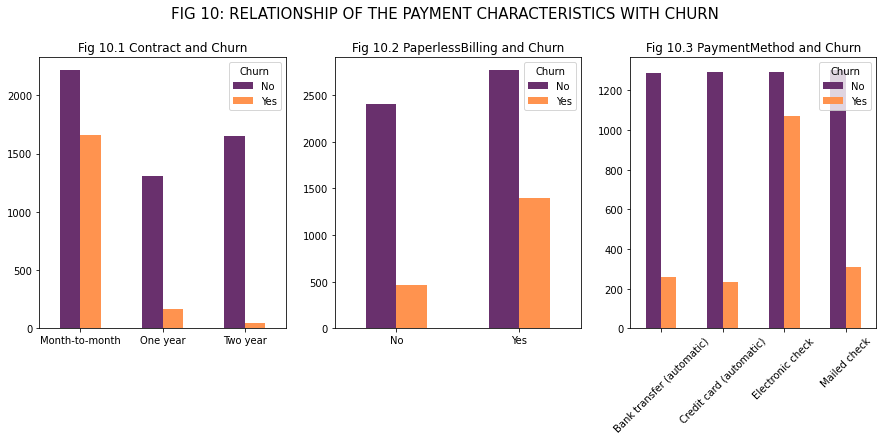

In [522]:
#Exploring the relationship of the payment  characteristics and churning
#specifying the plots' image details
figure, axis = plt.subplots(1, 3, figsize=(15,5))


#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(df["Contract"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 10.1 Contract and Churn", ax=axis[0], xlabel="")

pd.crosstab(df["PaperlessBilling"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=0, title="Fig 10.2 PaperlessBilling and Churn", ax=axis[1], xlabel="")

pd.crosstab(df["PaymentMethod"], columns=df["Churn"]).\
plot(kind="bar", color=["#69306D", "#ff934f"], rot=45, title="Fig 10.3 PaymentMethod and Churn", ax=axis[2], xlabel="")


#specifying the title of the main image
plt.suptitle("FIG 10: RELATIONSHIP OF THE PAYMENT CHARACTERISTICS WITH CHURN", fontsize=15, y=1.02)

Text(0.5, 1.01, 'FIGURE 11: BOXPLOTS OF NUMERICAL VARIABLES AND CHURN')

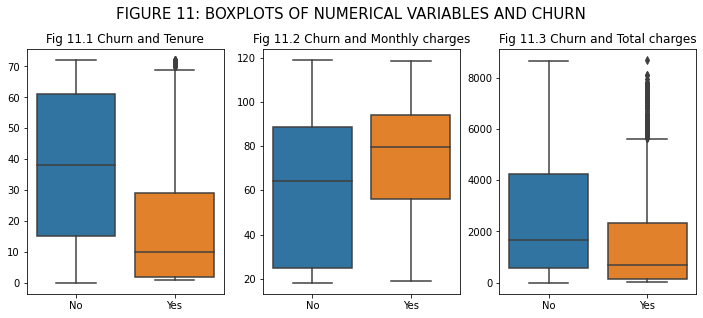

In [523]:
figure, axis = plt.subplots(1, 3, figsize=(12,4.5))

sns.boxplot(x="Churn", y="tenure", data=df, ax=axis[0]).\
set(title="Fig 11.1 Churn and Tenure", xlabel="", ylabel="")

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=axis[1]).\
set(title="Fig 11.2 Churn and Monthly charges", xlabel="", ylabel="")

sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=axis[2]).\
set(title="Fig 11.3 Churn and Total charges", xlabel="", ylabel="")

plt.suptitle("FIGURE 11: BOXPLOTS OF NUMERICAL VARIABLES AND CHURN", fontsize=15, y=1.01)



---


**The next sub-section will explore the relationship of the socio-demographic variables and the market characteristics**

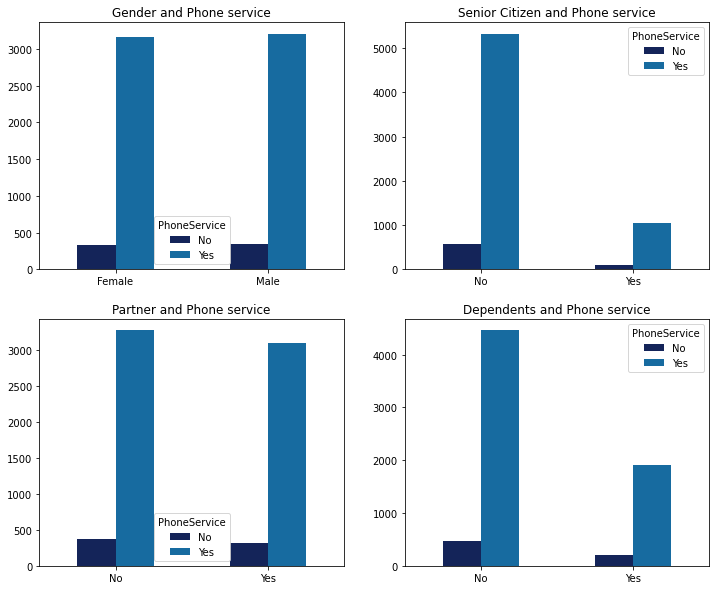

In [524]:
#Exploring the relationship between socio-demographic variables and Phone service
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["PhoneService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Phone service", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["PhoneService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Phone service", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["PhoneService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Phone service", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["PhoneService"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Phone service", ax=axis[1,1], xlabel="")


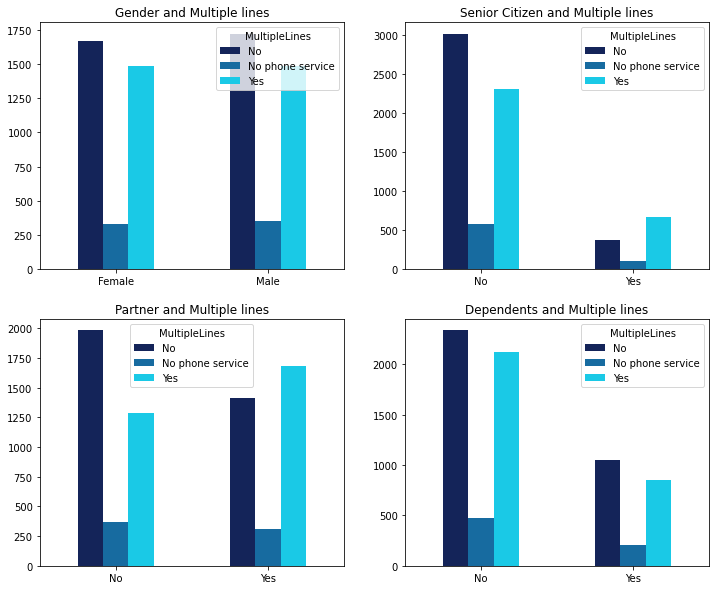

In [525]:
#Exploring the relationship between socio-demographic variables and Multiple lines
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["MultipleLines"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Multiple lines", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["MultipleLines"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Multiple lines", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["MultipleLines"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Multiple lines", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["MultipleLines"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Multiple lines", ax=axis[1,1], xlabel="")

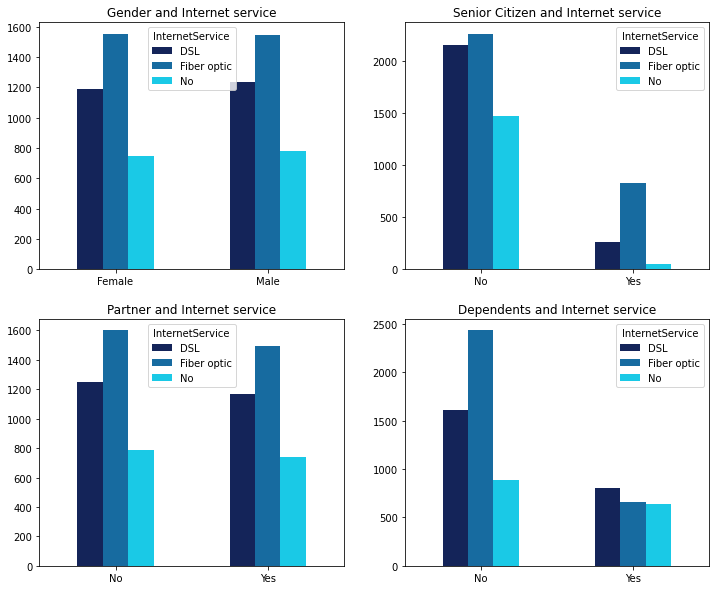

In [526]:
#Exploring the relationship between socio-demographic variables and Internet service
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["InternetService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Internet service", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["InternetService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Internet service", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["InternetService"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Internet service", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["InternetService"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Internet service", ax=axis[1,1], xlabel="")

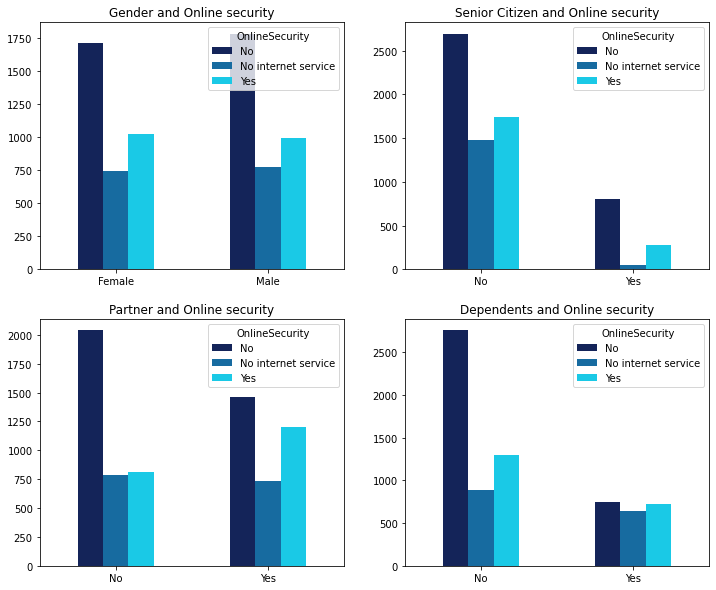

In [527]:
#Exploring the relationship between socio-demographic variables and Online security
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["OnlineSecurity"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Online security", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["OnlineSecurity"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Online security", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["OnlineSecurity"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Online security", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["OnlineSecurity"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Online security", ax=axis[1,1], xlabel="")

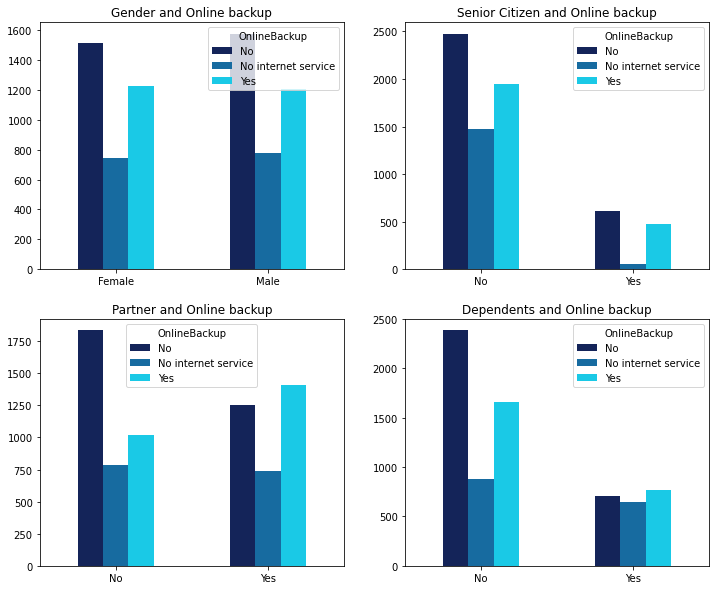

In [528]:
#Exploring the relationship between socio-demographic variables and Online backup
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["OnlineBackup"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Online backup", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["OnlineBackup"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Online backup", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["OnlineBackup"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Online backup", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["OnlineBackup"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Online backup", ax=axis[1,1], xlabel="")

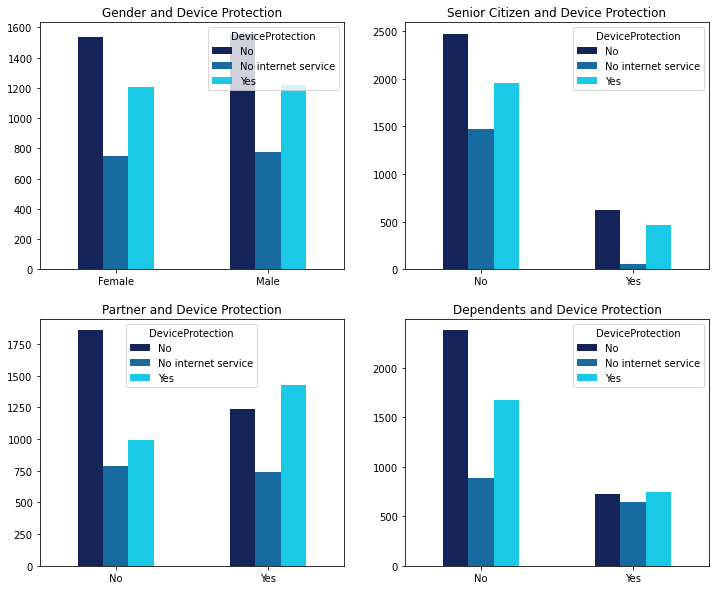

In [529]:
#Exploring the relationship between socio-demographic variables and Device protection
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["DeviceProtection"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Device Protection", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["DeviceProtection"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Device Protection", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["DeviceProtection"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Device Protection", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["DeviceProtection"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Device Protection", ax=axis[1,1], xlabel="")

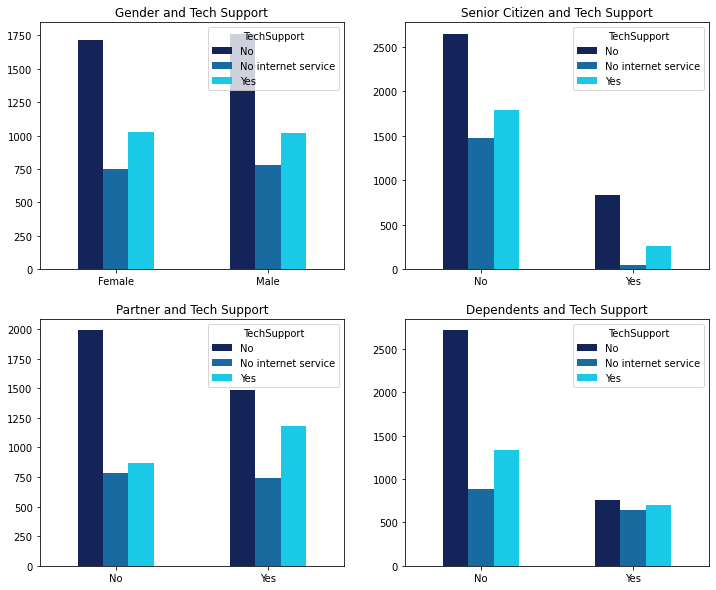

In [530]:
#Exploring the relationship between socio-demographic variables and Tech support
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["TechSupport"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Tech Support", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["TechSupport"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Tech Support", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["TechSupport"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Tech Support", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["TechSupport"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Tech Support", ax=axis[1,1], xlabel="")

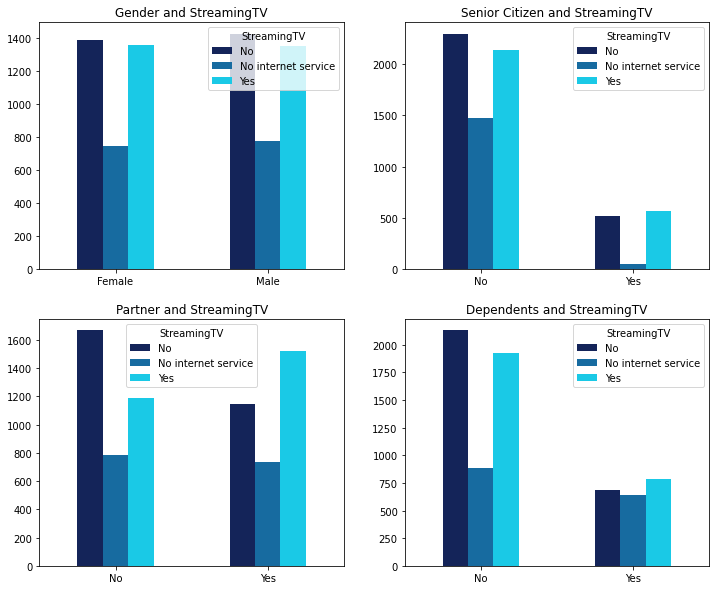

In [531]:
#Exploring the relationship between socio-demographic variables and Streaming TV
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["StreamingTV"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and StreamingTV", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["StreamingTV"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and StreamingTV", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["StreamingTV"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and StreamingTV", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["StreamingTV"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and StreamingTV", ax=axis[1,1], xlabel="")

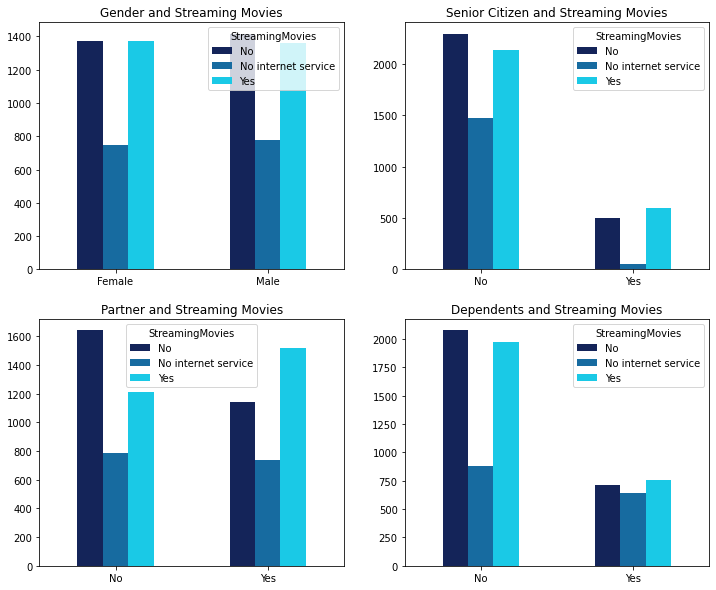

In [532]:
#Exploring the relationship between socio-demographic variables and Streaming movies
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["StreamingMovies"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Streaming Movies", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["StreamingMovies"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Streaming Movies", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["StreamingMovies"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Streaming Movies", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["StreamingMovies"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Streaming Movies", ax=axis[1,1], xlabel="")


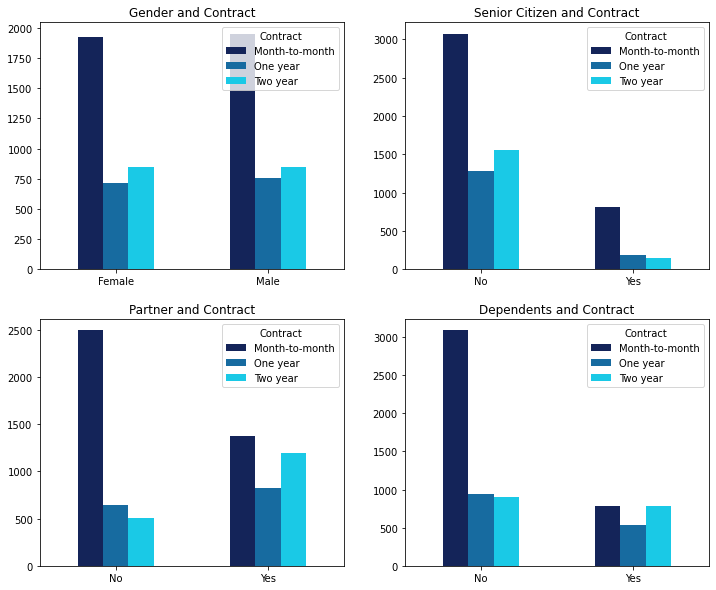

In [533]:
#Exploring the relationship between socio-demographic variables and Contract
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["Contract"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Contract", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["Contract"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Contract", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["Contract"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Contract", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["Contract"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Contract", ax=axis[1,1], xlabel="")


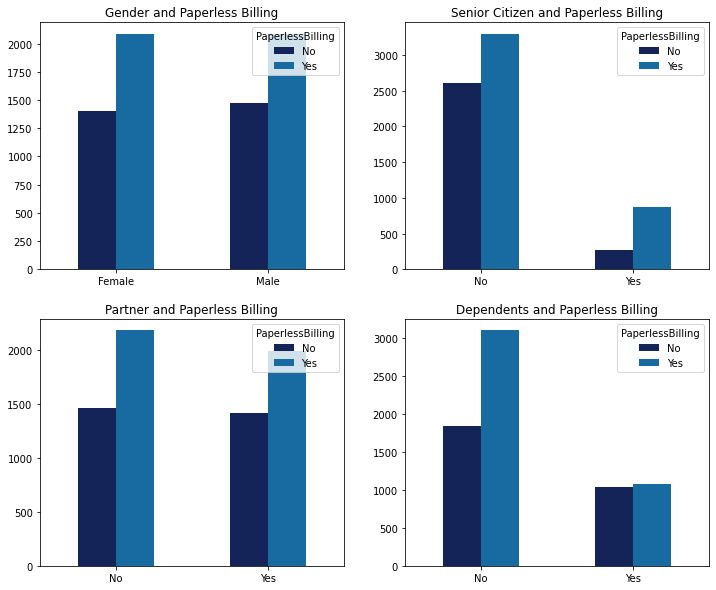

In [534]:
#Exploring the relationship between socio-demographic variables and Paper-less billing
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["PaperlessBilling"]).\
plot(kind="bar", color=["#142459", "#176ba0"], rot=0, title="Gender and Paperless Billing", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["PaperlessBilling"]).\
plot(kind="bar", color=["#142459", "#176ba0"], rot=0, title="Senior Citizen and Paperless Billing", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["PaperlessBilling"]).\
plot(kind="bar", color=["#142459", "#176ba0"], rot=0, title="Partner and Paperless Billing", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["PaperlessBilling"]).\
plot(kind="bar",color=["#142459", "#176ba0"], rot=0, title="Dependents and Paperless Billing", ax=axis[1,1], xlabel="")

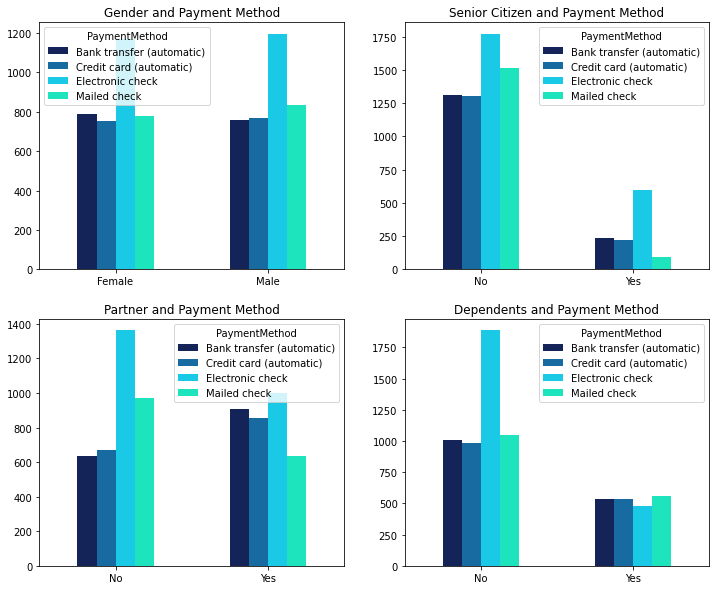

In [535]:
#Exploring the relationship between socio-demographic variables and Payment method
figure, axis = plt.subplots(2, 2, figsize=(12,10))

pd.crosstab(df["gender"], columns=df["PaymentMethod"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Gender and Payment Method", ax=axis[0,0], xlabel="")

pd.crosstab(df["SeniorCitizen"], columns=df["PaymentMethod"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Senior Citizen and Payment Method", ax=axis[0,1], xlabel="")

pd.crosstab(df["Partner"], columns=df["PaymentMethod"]).\
plot(kind="bar", color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Partner and Payment Method", ax=axis[1,0], xlabel="")

pd.crosstab(df["Dependents"], columns=df["PaymentMethod"]).\
plot(kind="bar",color=["#142459", "#176ba0", "#1AC9E6", "#1DE4BD"], rot=0, title="Dependents and Payment Method", ax=axis[1,1], xlabel="")

*Exploring the relationship between socio-demographic variables and tenure*

Text(0.5, 0.95, 'SOCIO-DEMOGRAPHIC CHARACTERISTICS AND TENURE')

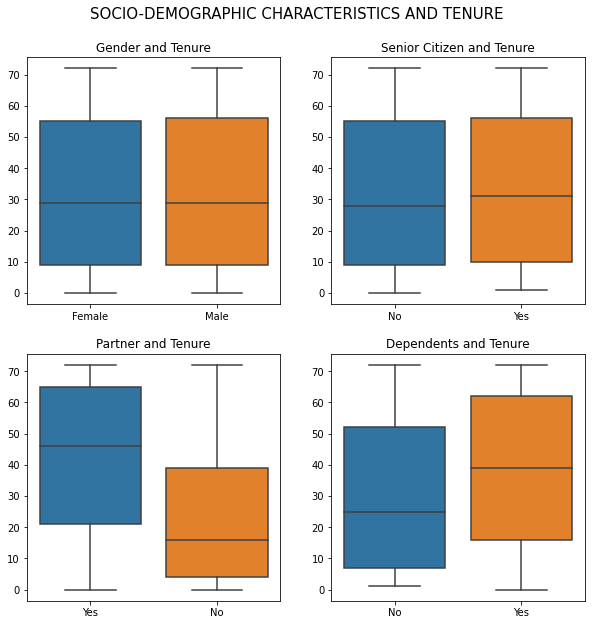

In [536]:
#Exploring the relationship between socio-demographic variables and tenure

figure, axis = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x="gender", y="tenure", ax=axis[0,0], data=df).\
set(title="Gender and Tenure", xlabel="", ylabel="")

sns.boxplot(x="SeniorCitizen", y="tenure", ax=axis[0,1], data=df).\
set(title="Senior Citizen and Tenure", xlabel="", ylabel="")

sns.boxplot(x="Partner", y="tenure", ax=axis[1,0], data=df).\
set(title="Partner and Tenure", xlabel="", ylabel="")

sns.boxplot(x="Dependents", y="tenure", ax=axis[1,1], data=df).\
set(title="Dependents and Tenure", xlabel="", ylabel="")

plt.suptitle("SOCIO-DEMOGRAPHIC CHARACTERISTICS AND TENURE", fontsize=15, y=0.95)

*Exploring the relationship between socio-demographic variables and monthly charges*

Text(0.5, 0.95, 'SOCIO-DEMOGRAPHIC CHARACTERISTICS AND MONTHLY CHARGES')

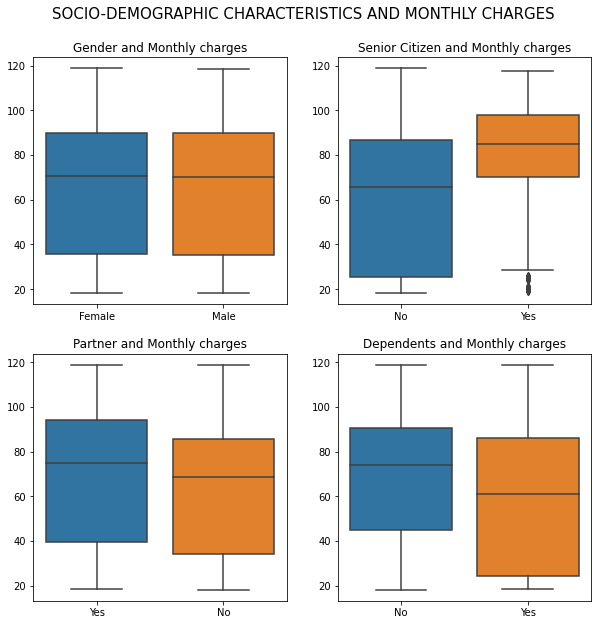

In [537]:
#Exploring the relationship between socio-demographic variables and monthly charges

figure, axis = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x="gender", y="MonthlyCharges", ax=axis[0,0], data=df).\
set(title="Gender and Monthly charges", xlabel="", ylabel="")

sns.boxplot(x="SeniorCitizen", y="MonthlyCharges", ax=axis[0,1], data=df).\
set(title="Senior Citizen and Monthly charges", xlabel="", ylabel="")

sns.boxplot(x="Partner", y="MonthlyCharges", ax=axis[1,0], data=df).\
set(title="Partner and Monthly charges", xlabel="", ylabel="")

sns.boxplot(x="Dependents", y="MonthlyCharges", ax=axis[1,1], data=df).\
set(title="Dependents and Monthly charges", xlabel="", ylabel="")

plt.suptitle("SOCIO-DEMOGRAPHIC CHARACTERISTICS AND MONTHLY CHARGES", fontsize=15, y=0.95)

Text(0.5, 0.95, 'SOCIO-DEMOGRAPHIC CHARACTERISTICS AND TOTAL CHARGES')

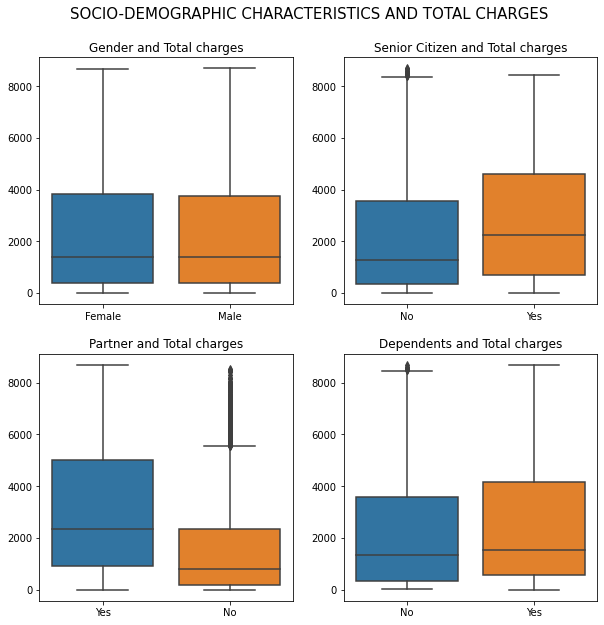

In [538]:
#Exploring the relationship between socio-demographic variables and tenure

figure, axis = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x="gender", y="TotalCharges", ax=axis[0,0], data=df).\
set(title="Gender and Total charges", xlabel="", ylabel="")

sns.boxplot(x="SeniorCitizen", y="TotalCharges", ax=axis[0,1], data=df).\
set(title="Senior Citizen and Total charges", xlabel="", ylabel="")

sns.boxplot(x="Partner", y="TotalCharges", ax=axis[1,0], data=df).\
set(title="Partner and Total charges", xlabel="", ylabel="")

sns.boxplot(x="Dependents", y="TotalCharges", ax=axis[1,1], data=df).\
set(title="Dependents and Total charges", xlabel="", ylabel="")

plt.suptitle("SOCIO-DEMOGRAPHIC CHARACTERISTICS AND TOTAL CHARGES", fontsize=15, y=0.95)



---

**Relationship between market characteristics**

[Text(0.5, 1.0, 'CORRELATION HEATMAP OF THE NUMERICAL VARIABLES IN THE DATASET')]

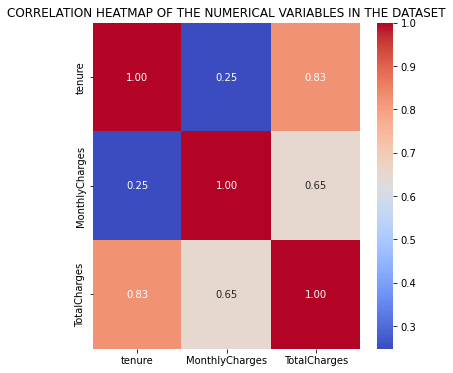

In [539]:
#Relationship between the numeric market characteristics

plt.rcParams['figure.figsize']=(6,6) #specifying the figure size

#specifying the heatmap chart alongside its customisations
sns.heatmap(df.corr(), cbar=True, fmt='.2f', annot=True, cmap="coolwarm").\
set(title="CORRELATION HEATMAP OF THE NUMERICAL VARIABLES IN THE DATASET")

Text(0.5, 0.95, 'BOXPLOTS OF MARKET CHARACTERISTICS AND TENURE')

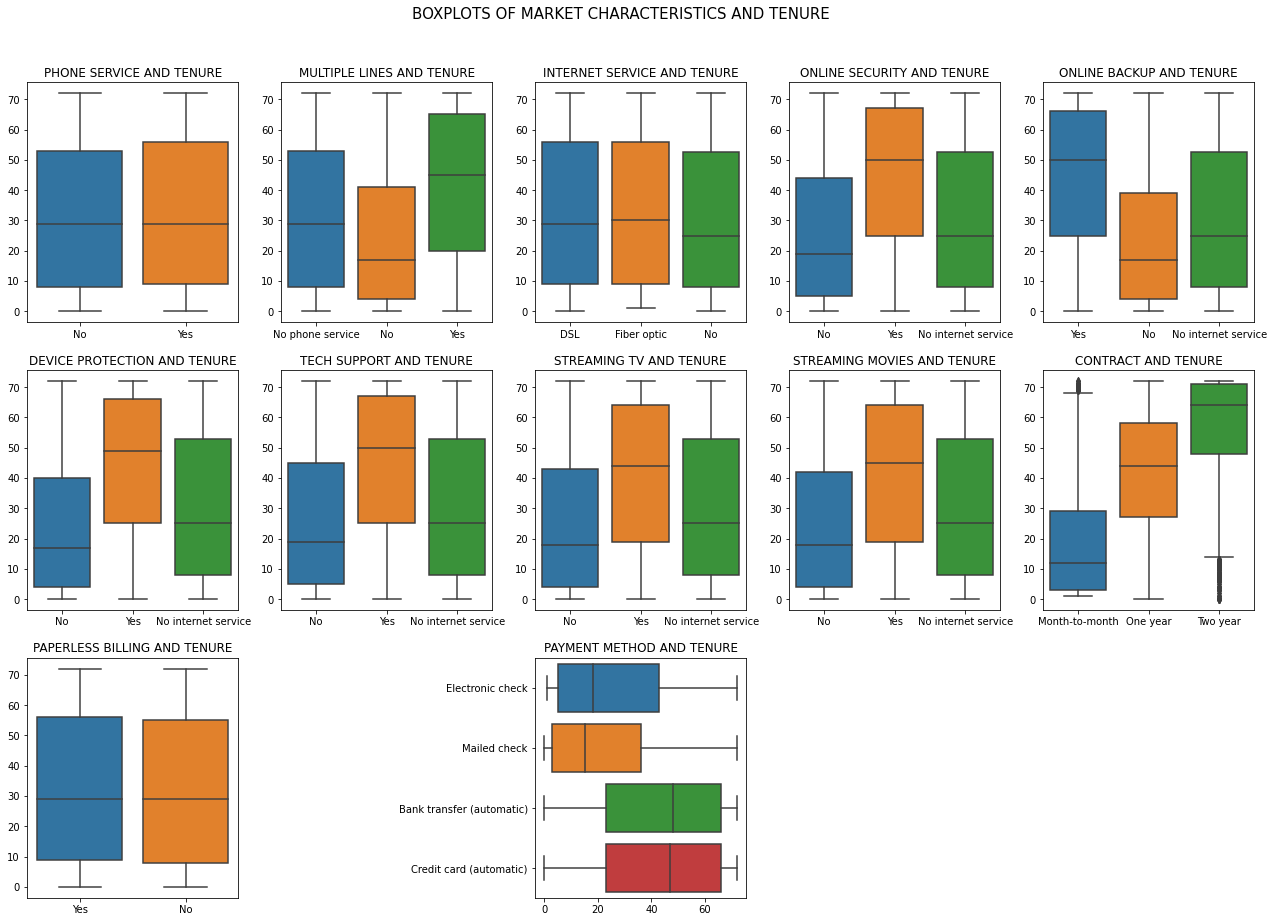

In [540]:
#Relationship between each categorical market characteristics and tenure

figure, axis = plt.subplots(3, 5, figsize=(22,15))

#Specifying the details of each catplot including their customisation details and titles
sns.boxplot(x="PhoneService", y="tenure", ax=axis[0,0], data=df).\
set(title="PHONE SERVICE AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="MultipleLines", y="tenure", ax=axis[0,1], data=df).\
set(title="MULTIPLE LINES AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="InternetService", y="tenure", ax=axis[0,2], data=df).\
set(title="INTERNET SERVICE AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="OnlineSecurity", y="tenure", ax=axis[0,3], data=df).\
set(title="ONLINE SECURITY AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="OnlineBackup", y="tenure", ax=axis[0,4], data=df).\
set(title="ONLINE BACKUP AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="DeviceProtection", y="tenure", ax=axis[1,0], data=df).\
set(title="DEVICE PROTECTION AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="TechSupport", y="tenure", ax=axis[1,1], data=df).\
set(title="TECH SUPPORT AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="StreamingTV", y="tenure", ax=axis[1,2], data=df).\
set(title="STREAMING TV AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="StreamingMovies", y="tenure", ax=axis[1,3], data=df).\
set(title="STREAMING MOVIES AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="Contract", y="tenure", ax=axis[1,4], data=df).\
set(title="CONTRACT AND TENURE", xlabel="", ylabel="")

sns.boxplot(x="PaperlessBilling", y="tenure", ax=axis[2,0], data=df).\
set(title="PAPERLESS BILLING AND TENURE", xlabel="", ylabel="")

sns.boxplot(y="PaymentMethod", x="tenure", ax=axis[2,2], data=df).\
set(title="PAYMENT METHOD AND TENURE", xlabel="", ylabel="")

axis[2,1].axis("off")
axis[2,3].axis("off")
axis[2,4].axis("off")

plt.suptitle("BOXPLOTS OF MARKET CHARACTERISTICS AND TENURE", fontsize=15, y=0.95)

Text(0.5, 0.95, 'BOXPLOTS OF MARKET CHARACTERISTICS AND MONTHLY CHARGES')

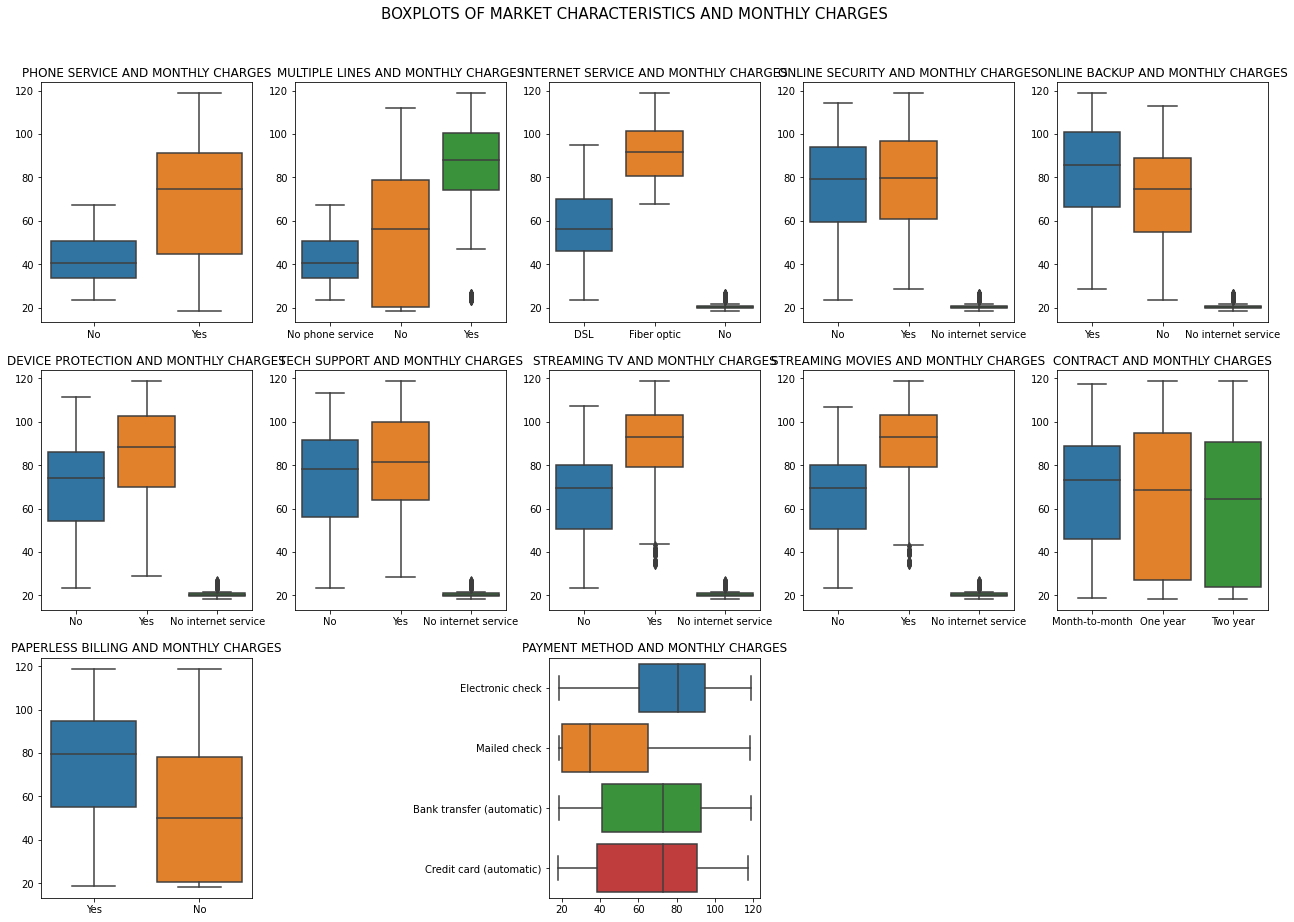

In [541]:
#Relationship between each categorical market characteristics and MONTHLY CHARGES

figure, axis = plt.subplots(3, 5, figsize=(22,15))

#Specifying the details of each catplot including their customisation details and titles
sns.boxplot(x="PhoneService", y="MonthlyCharges", ax=axis[0,0], data=df).\
set(title="PHONE SERVICE AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="MultipleLines", y="MonthlyCharges", ax=axis[0,1], data=df).\
set(title="MULTIPLE LINES AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="InternetService", y="MonthlyCharges", ax=axis[0,2], data=df).\
set(title="INTERNET SERVICE AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="OnlineSecurity", y="MonthlyCharges", ax=axis[0,3], data=df).\
set(title="ONLINE SECURITY AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="OnlineBackup", y="MonthlyCharges", ax=axis[0,4], data=df).\
set(title="ONLINE BACKUP AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="DeviceProtection", y="MonthlyCharges", ax=axis[1,0], data=df).\
set(title="DEVICE PROTECTION AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="TechSupport", y="MonthlyCharges", ax=axis[1,1], data=df).\
set(title="TECH SUPPORT AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="StreamingTV", y="MonthlyCharges", ax=axis[1,2], data=df).\
set(title="STREAMING TV AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="StreamingMovies", y="MonthlyCharges", ax=axis[1,3], data=df).\
set(title="STREAMING MOVIES AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="Contract", y="MonthlyCharges", ax=axis[1,4], data=df).\
set(title="CONTRACT AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(x="PaperlessBilling", y="MonthlyCharges", ax=axis[2,0], data=df).\
set(title="PAPERLESS BILLING AND MONTHLY CHARGES", xlabel="", ylabel="")

sns.boxplot(y="PaymentMethod", x="MonthlyCharges", ax=axis[2,2], data=df).\
set(title="PAYMENT METHOD AND MONTHLY CHARGES", xlabel="", ylabel="")

axis[2,1].axis("off")
axis[2,3].axis("off")
axis[2,4].axis("off")

plt.suptitle("BOXPLOTS OF MARKET CHARACTERISTICS AND MONTHLY CHARGES", fontsize=15, y=0.95)

Text(0.5, 0.95, 'BOXPLOTS OF MARKET CHARACTERISTICS AND TOTAL CHARGES')

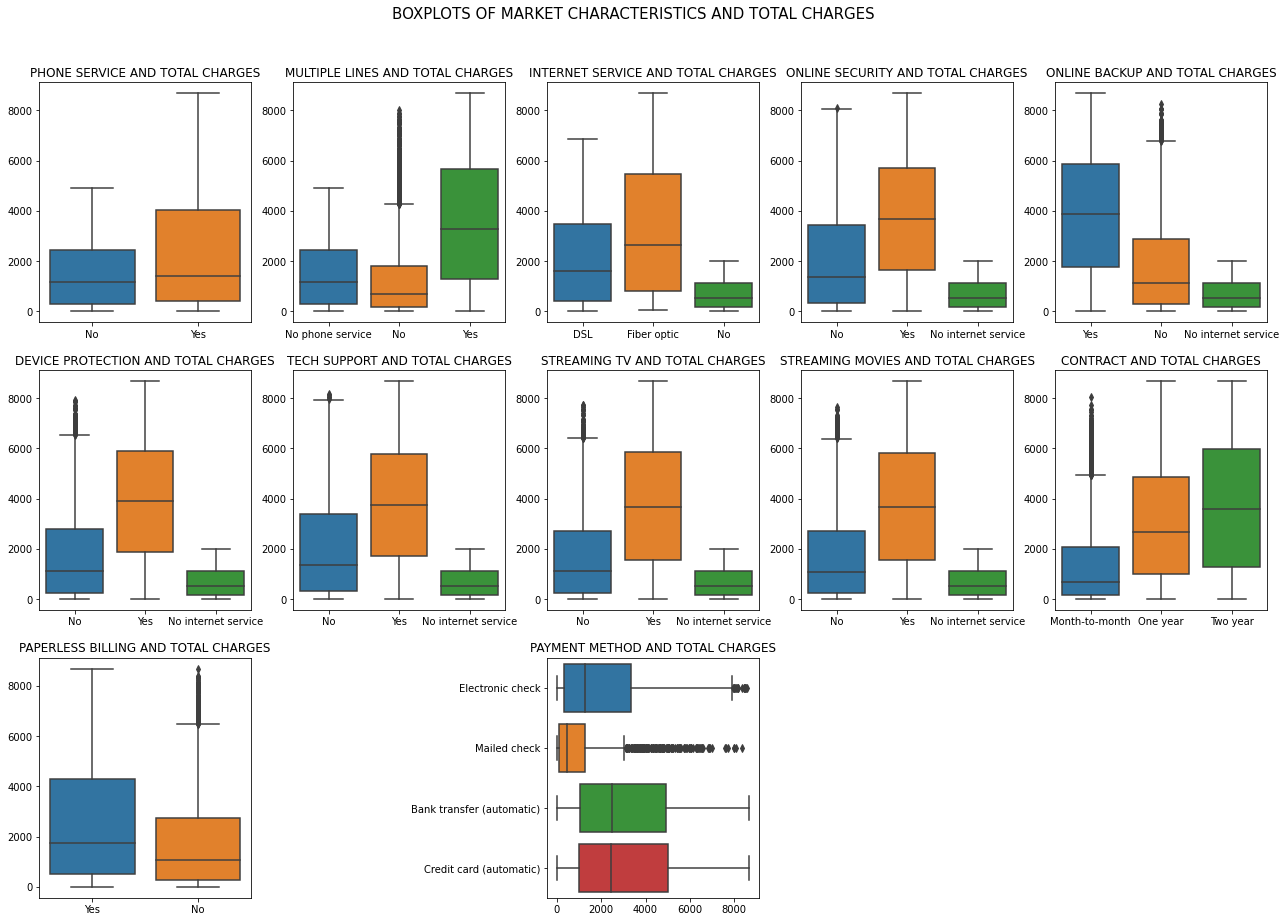

In [542]:
#Relationship between each categorical market characteristics and TotalCharges

figure, axis = plt.subplots(3, 5, figsize=(22,15))

#Specifying the details of each catplot including their customisation details and titles
sns.boxplot(x="PhoneService", y="TotalCharges", ax=axis[0,0], data=df).\
set(title="PHONE SERVICE AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="MultipleLines", y="TotalCharges", ax=axis[0,1], data=df).\
set(title="MULTIPLE LINES AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="InternetService", y="TotalCharges", ax=axis[0,2], data=df).\
set(title="INTERNET SERVICE AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="OnlineSecurity", y="TotalCharges", ax=axis[0,3], data=df).\
set(title="ONLINE SECURITY AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="OnlineBackup", y="TotalCharges", ax=axis[0,4], data=df).\
set(title="ONLINE BACKUP AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="DeviceProtection", y="TotalCharges", ax=axis[1,0], data=df).\
set(title="DEVICE PROTECTION AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="TechSupport", y="TotalCharges", ax=axis[1,1], data=df).\
set(title="TECH SUPPORT AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="StreamingTV", y="TotalCharges", ax=axis[1,2], data=df).\
set(title="STREAMING TV AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="StreamingMovies", y="TotalCharges", ax=axis[1,3], data=df).\
set(title="STREAMING MOVIES AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="Contract", y="TotalCharges", ax=axis[1,4], data=df).\
set(title="CONTRACT AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(x="PaperlessBilling", y="TotalCharges", ax=axis[2,0], data=df).\
set(title="PAPERLESS BILLING AND TOTAL CHARGES", xlabel="", ylabel="")

sns.boxplot(y="PaymentMethod", x="TotalCharges", ax=axis[2,2], data=df).\
set(title="PAYMENT METHOD AND TOTAL CHARGES", xlabel="", ylabel="")

axis[2,1].axis("off")
axis[2,3].axis("off")
axis[2,4].axis("off")

plt.suptitle("BOXPLOTS OF MARKET CHARACTERISTICS AND TOTAL CHARGES", fontsize=15, y=0.95)

# STEP 4: MACHINE LEARNING PRE-PROCESSING





---

**MACHINE LEARNING PRE-PROCESSING**

In [543]:
#A quick look at our data once again so as to decide what variables to encode
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,5901,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [544]:
#making an overall copy of the data for machine learning so as to preserve our ou=riginal data, JUST IN CASE
df1 = df.copy()

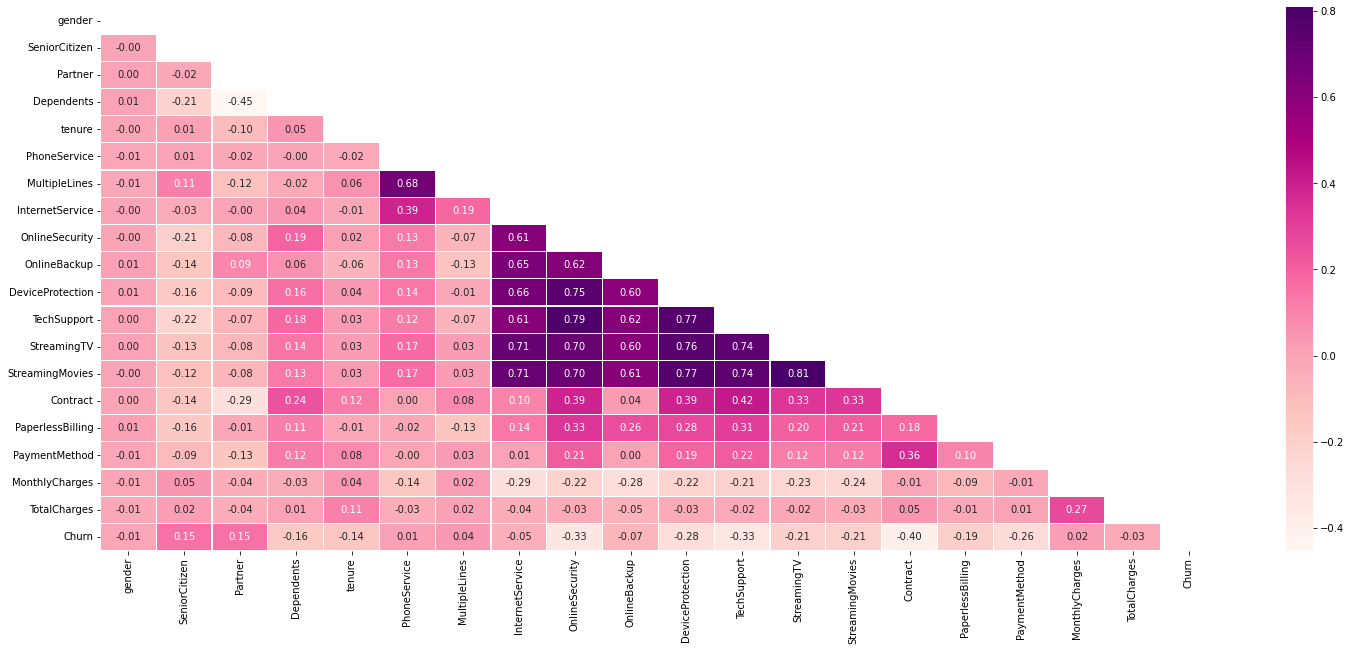

In [545]:
## ASSESSING FOR MULTI-COLLINEARITY USING A HEATMAP FOR ALL FEATURES
plt.figure(figsize=(25,10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, fmt='.2f', yticklabels = corr.columns, cmap = 'RdPu', annot = True, linewidths = .2)

In [546]:
#dropping the highly correlated variables from both data subsets

df1.drop(["MultipleLines", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport",
             "StreamingMovies", "StreamingTV"], axis = 1, inplace = True)

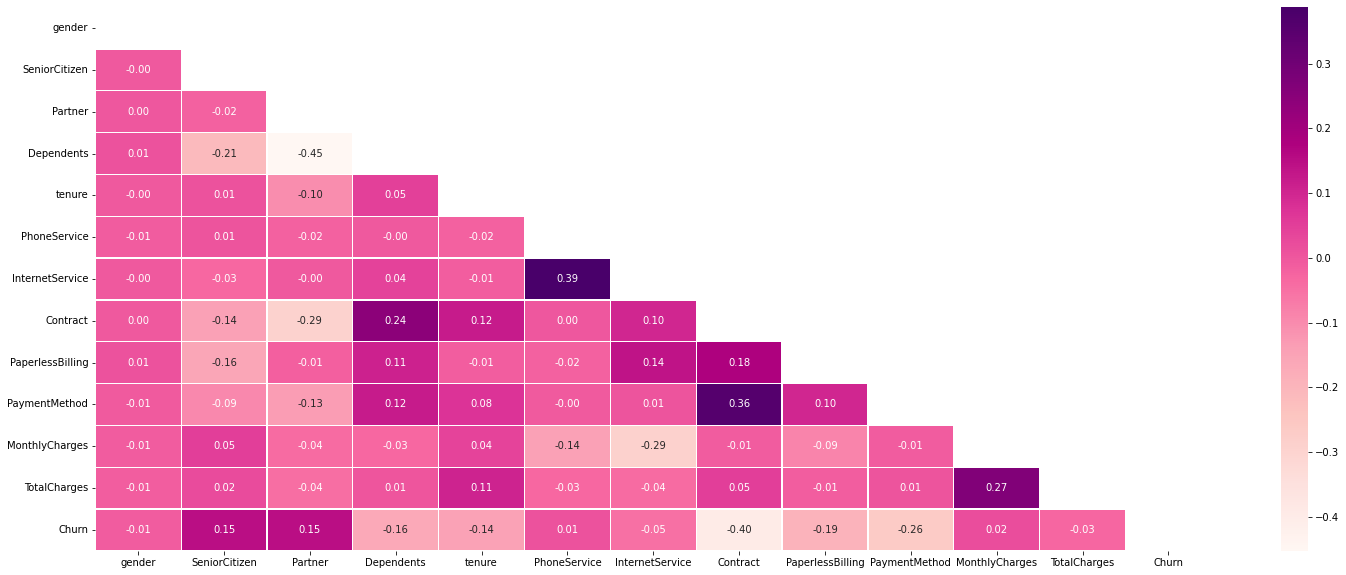

In [547]:
## RE-ASSESSING FOR MULTI-COLLINEARITY USING A HEATMAP FOR ALL FEATURES
plt.figure(figsize=(25,10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, fmt='.2f', yticklabels = corr.columns, cmap = 'RdPu', annot = True, linewidths = .2)

Now going to work with these variables. 
We will still be using these partially collinear variables since they are somewhat unique to the data.

In [548]:
#specifying which columns that will be encoded and according to their respective types
label_cols = ["Contract", "PaymentMethod", "Churn"]

onehot_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
               "InternetService", "PaperlessBilling"]

In [549]:
#initiating both types of encoding
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()

#performing the label encoding
df1[label_cols] = df1[label_cols].apply(labelencoder.fit_transform)

#performing the onehot encoding and extrapolating the names of its new columns
onehot_encoded_df1 = onehotencoder.fit_transform(df1[onehot_cols]).toarray()
feature_names = onehotencoder.get_feature_names_out(onehot_cols)


#using the extracted column names to reform a new dataframe
onehot_encoded_df1_data = pd.DataFrame(onehot_encoded_df1, columns=[feature_names])

#appending the new dataframe to each respective original dataset
df1_data = pd.concat([df1, onehot_encoded_df1_data], axis=1)

#dropping the former columns which have been encoded using the onehot encoding method
df1_data.drop(["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
               "InternetService", "PaperlessBilling"], axis=1, inplace = True)

#confirming the shape of the new sub-datasets
print(df1_data.shape)

(7043, 21)


In [550]:
#examing thw data types of both train and test subsets to ensure they are now numeric
print(df1_data.dtypes)

tenure                              int64
Contract                            int64
PaymentMethod                       int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
(gender_Female,)                  float64
(gender_Male,)                    float64
(SeniorCitizen_No,)               float64
(SeniorCitizen_Yes,)              float64
(Partner_No,)                     float64
(Partner_Yes,)                    float64
(Dependents_No,)                  float64
(Dependents_Yes,)                 float64
(PhoneService_No,)                float64
(PhoneService_Yes,)               float64
(InternetService_DSL,)            float64
(InternetService_Fiber optic,)    float64
(InternetService_No,)             float64
(PaperlessBilling_No,)            float64
(PaperlessBilling_Yes,)           float64
dtype: object


In [551]:
#making respective copies for each classification type from the mother machine learning data (df1)

df_random = df1_data.copy()
df_decision = df1_data.copy()
df_logistic = df1_data.copy()

# MACHINE LEARNING: RANDOM FOREST CLASSIFIER



---

**Performing the classification**

In [580]:
#splitting the data into train and test subsets for random forest
train_random, test_random = train_test_split(df_random, test_size = 0.2, shuffle=True, random_state = 20)

In [581]:
#resetting the shuffled index
train_random = train_random.reset_index(drop=True)
test_random = test_random.reset_index(drop=True)

In [582]:
#specifying the dependent and independent variables for both subsets
x_random = train_random.drop(columns=["Churn"])
y_random = train_random["Churn"]

x_random_test = test_random.drop(columns=["Churn"])
y_random_test = test_random["Churn"]

In [583]:
#assessing for balance
y_random.value_counts()

0    4111
1    1523
Name: Churn, dtype: int64

In [584]:
#using smote to balance the data by over-sampling
smote_random = SMOTE(random_state = 20)
x_random_bal, y_random_bal = smote_random.fit_resample(x_random, y_random)

y_random_bal.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



0    4111
1    4111
Name: Churn, dtype: int64

In [585]:
#performing the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_random_bal, y_random_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



RandomForestClassifier()

In [586]:
#making predictions using the trained model
preds_random = rfc.predict(x_random_test)
preds_random

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



array([0, 0, 0, ..., 0, 0, 0])



---

**Evaluating the classifier**

In [587]:
#evaluating the performance of the random forest model

print(f1_score(y_random_test, preds_random))
print(accuracy_score(y_random_test, preds_random))
print(precision_score(y_random_test, preds_random))
print(recall_score(y_random_test, preds_random))

0.5521292217327459
0.7835344215755855
0.5611940298507463
0.5433526011560693


In [613]:
#Confusion matrix for random forest classifier model 
cm_rf = confusion_matrix(y_random_test, preds_random)

#Plot the matrix
import plotly.figure_factory as ff
x = ['Actual_No Churn', 'Actual_Churn']
y = ['Pred_No Churn', 'PredChurn']
fig = ff.create_annotated_heatmap(cm_rf, x=x,y=y)
fig.update_layout(height = 400, width = 500,title_text = "Random Forest Confusion Matrix")
fig.show()

In [611]:
cm_rf

array([[916, 147],
       [158, 188]])

# MACHINE LEARNING: DECISION TREE CLASSIFIER



---

**Performing the classification**

In [589]:
#splitting the data into train and test subsets for decision tree
train_decision, test_decision = train_test_split(df_decision, test_size = 0.2, shuffle=True, random_state = 20)

In [590]:
#resetting the shuffled index
train_decision = train_decision.reset_index(drop=True)
test_decision = test_decision.reset_index(drop=True)

In [591]:
#specifying the dependent and independent variables for both subsets
x_decision = train_decision.drop(columns=["Churn"])
y_decision = train_decision["Churn"]

x_decision_test = test_decision.drop(columns=["Churn"])
y_decision_test = test_decision["Churn"]

In [592]:
#assessing for balance
y_decision.value_counts()

0    4111
1    1523
Name: Churn, dtype: int64

In [593]:
#using smote to balance the data by over-sampling
smote_decision = SMOTE(random_state = 20)
x_decision_bal, y_decision_bal = smote_decision.fit_resample(x_decision, y_decision)

y_decision_bal.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



0    4111
1    4111
Name: Churn, dtype: int64

In [594]:
#performing the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_decision_bal, y_decision_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



DecisionTreeClassifier()

In [595]:
#making predictions using the trained model
preds_decision = dtc.predict(x_decision_test)
preds_decision

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



array([0, 0, 0, ..., 0, 0, 0])



---


**Evalauting the classifier**

In [596]:
#evaluating the performance of the decision tree model

print(f1_score(y_decision_test, preds_decision))
print(accuracy_score(y_decision_test, preds_decision))
print(precision_score(y_decision_test, preds_decision))
print(recall_score(y_decision_test, preds_decision))

0.4966974900924703
0.7295954577714692
0.45742092457420924
0.5433526011560693


In [614]:
#Confusion matrix for decision tree classifier model 
cm_dt = confusion_matrix(y_decision_test, preds_decision)

#Plot the matrix
import plotly.figure_factory as ff
x = ['Actual_No Churn', 'Actual_Churn']
y = ['Pred_No Churn', 'PredChurn']
fig = ff.create_annotated_heatmap(cm_dt, x=x,y=y)
fig.update_layout(height = 400, width = 500,title_text = "Decision Tree Confusion Matrix")
fig.show()

# MACHINE LEARNING: LOGISTIC REGRESSION



---

**Performing the classfication**

In [598]:
#splitting the data into train and test subsets for Logistic regression
train_logistic, test_logistic = train_test_split(df_logistic, test_size = 0.2, shuffle=True, random_state = 20)

In [599]:
#resetting the shuffled index
train_logistic = train_logistic.reset_index(drop=True)
test_logistic = test_logistic.reset_index(drop=True)

In [600]:
#specifying the dependent and independent variables for both subsets
x_logistic = train_logistic.drop(columns=["Churn"])
y_logistic = train_logistic["Churn"]

x_logistic_test = test_logistic.drop(columns=["Churn"])
y_logistic_test = test_logistic["Churn"]

In [601]:
#assessing for balance
y_logistic.value_counts()

0    4111
1    1523
Name: Churn, dtype: int64

In [602]:
#using smote to balance the data by over-sampling
smote_logistic = SMOTE(random_state = 20)
x_logistic_bal, y_logistic_bal = smote_logistic.fit_resample(x_logistic, y_logistic)

y_logistic_bal.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



0    4111
1    4111
Name: Churn, dtype: int64

In [603]:
#performing the logistic regression classifier
lrc = LogisticRegression()
lrc.fit(x_logistic_bal, y_logistic_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [604]:
#making predictions using the trained model
preds_logistic = lrc.predict(x_logistic_test)
preds_logistic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



array([0, 0, 1, ..., 0, 0, 1])



---


**Evaluating the model**

In [605]:
#evaluating the performance of the logistic regression model

print(f1_score(y_logistic_test, preds_logistic))
print(accuracy_score(y_logistic_test, preds_logistic))
print(precision_score(y_logistic_test, preds_logistic))
print(recall_score(y_logistic_test, preds_logistic))

0.6023329798515377
0.7338537970191625
0.47571189279731996
0.8208092485549133


In [615]:
#Confusion matrix for Logistic regression classifier model 
cm_lr = confusion_matrix(y_logistic_test, preds_logistic)

#Plot the matrix
import plotly.figure_factory as ff
x = ['Actual_No Churn', 'Actual_Churn']
y = ['Pred_No Churn', 'PredChurn']
fig = ff.create_annotated_heatmap(cm_lr, x=x,y=y)
fig.update_layout(height = 400, width = 500,title_text = "Logistic Regression Confusion Matrix")
fig.show()